In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[:10], '\n')
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[-10:])

NU_NOTA_MT                1.000000
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_REDACAO           0.379376
TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP5             0.343337
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP2             0.335638
Name: NU_NOTA_MT, dtype: float64 

IN_MARCA_PASSO             NaN
IN_SONDA                   NaN
IN_MEDICAMENTOS            NaN
IN_SALA_INDIVIDUAL         NaN
IN_SALA_ESPECIAL           NaN
IN_SALA_ACOMPANHANTE       NaN
IN_MOBILIARIO_ESPECIFICO   NaN
IN_MATERIAL_ESPECIFICO     NaN
TP_PRESENCA_LC             NaN
TP_PRESENCA_MT             NaN
Name: NU_NOTA_MT, dtype: float64


In [5]:
#features = ['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
            'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
features_corr = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
                 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
df_train = train[features_corr]
df_test = test[features]

In [6]:
df_train.shape

(13730, 10)

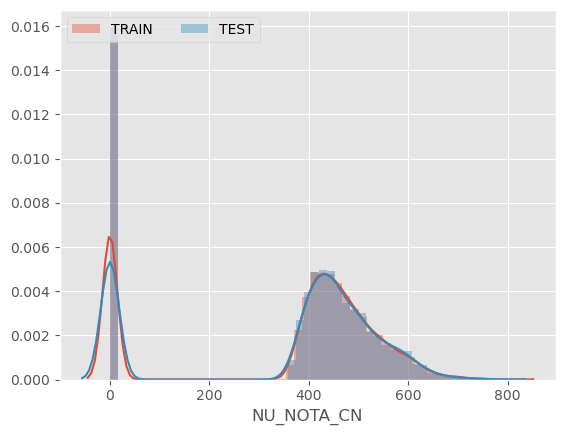

In [7]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [8]:
df_train.isnull().sum()

NU_NOTA_MT         3597
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

In [9]:
df_test.isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64

In [10]:
df_train.fillna(0,inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_4436\4003775195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(0,inplace=True)


In [11]:
df_test.fillna(0,inplace=True)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_4436\1155736876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(0,inplace=True)


In [12]:
y_train = df_train['NU_NOTA_MT']
df_train.drop('NU_NOTA_MT', axis=1, inplace=True)
x_train = df_train
x_test = df_test[features]
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_4436\3057497327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('NU_NOTA_MT', axis=1, inplace=True)


In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
#            min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)   

In [14]:
regressor.fit(x_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mae', max_depth=8, n_estimators=500, n_jobs=-1,
                      random_state=0)

In [15]:
x_test = df_test[features] 
x_test = sc.transform(x_test)

In [16]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [17]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 40.31835824
MSE: 3639.15202359
RMSE: 60.32538457


In [18]:
y_pred_test

array([417.8104, 442.2956, 595.1624, ..., 692.0697, 443.1866,   0.    ])

In [19]:
submission = pd.DataFrame()
submission['NU_INSCRICAO'] = test.NU_INSCRICAO
submission['NU_NOTA_MT'] = y_pred_test.round(1)

In [20]:
submission.sample(20)

,NU_INSCRICAO,NU_NOTA_MT
3018,15337a2a4015542f2d7ce166e1af4fa50bc00f06,472.2
280,202da3f471204ad489ebf0c3856437337534112d,0.0
4111,5ecb8e72da4e5dde4d8555f3ca53e54d0df6ee32,451.7
4061,461e4faee005cf8421dd1390e73c8ecefe55708c,0.0
2267,c80548ba80dc06fe7f952b6d46a541477d0ec65b,455.4
2468,ebb32cf7d8b122a5dabd41723d31d834147b0944,439.0
2772,387e9fa8f1278ffb136f52b79a2ebb4eab6d2c48,416.3
501,0b01e142abc07e710ae4f8a315866d95f16d592b,526.8
1026,d43c8bc37d22f63102d62317b61cbcdb1331054c,586.0
3734,dd7b89ef2c69d23491f3e4eaa9d23e0ec85cdbc2,446.7


In [21]:
submission.to_csv('answer.csv', index=False, header=True)